1. Regresión Lineal Simple
Ejercicio:
Tienes un conjunto de datos con las horas de estudio (X) y las calificaciones finales (y) de 30 estudiantes. Construye un modelo de regresión lineal simple para predecir la calificación final basada en las horas de estudio.

Qué hacer:

Ajustar el modelo de regresión lineal.

Interpretar los coeficientes.

Evaluar la bondad del ajuste (R²).

Predecir la calificación para un estudiante que estudió 5 horas.

In [9]:
# Horas de estudio (X) y calificaciones (y)
horas_estudio = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
calificaciones = [50, 55, 65, 70, 72, 80, 85, 87, 90, 95]



In [45]:
import pandas as pd
lista=[horas_estudio,calificaciones]
df = pd.DataFrame({
    "horas_estudio": horas_estudio,
    "calificaciones": calificaciones
})
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   horas_estudio   10 non-null     int64
 1   calificaciones  10 non-null     int64
dtypes: int64(2)
memory usage: 292.0 bytes
None


In [30]:
X=df[["horas_estudio"]]
y=df["calificaciones"]

In [44]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
model=LinearRegression().fit(X_train_scaled,y_train)
y_predict=model.predict(X_test_scaled)
r2 = r2_score(y_test, y_predict)
mase=mean_absolute_error(y_test,y_predict)
mse=mean_squared_error(y_test,y_predict)
print(f"R² score: {r2:.4f}")
print(f"MaSE: {mase:.4f} de {df['calificaciones'].mean():.2f}")
print(f"MSE: {mse:.4f} de {df['calificaciones'].mean():.2f}")



R² score: 0.9702
MaSE: 3.0000 de 74.90
MSE: 9.1311 de 74.90


In [59]:
x_new=[[2],[28]]
new_X_sacalr=scaler_X.transform(x_new)
y_predict=model.predict(new_X_sacalr)
print(y_predict)

[ 62.31563099 100.40380813]


2. Regresión Múltiple
Ejercicio:
Tienes datos de 50 viviendas con las siguientes variables: área en metros cuadrados, número de habitaciones, antigüedad (años) y precio de venta. Construye un modelo de regresión múltiple para predecir el precio de venta usando las otras variables como predictoras.

Qué hacer:

Ajustar el modelo de regresión múltiple.

Identificar qué variables son significativas.

Evaluar el ajuste con R² y error estándar.

Predecir el precio de una vivienda con 120 m², 3 habitaciones y 10 años de antigüedad.

In [103]:
import pandas as pd

datos_viviendas = pd.DataFrame({
    'area_m2': [
        50, 60, 70, 80, 90, 100, 110, 120, 130, 140,
        150, 160, 170, 180, 190, 200, 220, 240, 260, 280,
        300, 320, 340, 360, 380, 400, 420, 440, 460, 480
    ],
    'habitaciones': [
        2, 2, 2, 3, 3, 3, 3, 4, 4, 4,
        4, 4, 5, 5, 5, 5, 5, 6, 6, 6,
        6, 6, 7, 7, 7, 7, 8, 8, 8, 8
    ],
    'antiguedad': [
        20, 18, 16, 15, 14, 13, 12, 10, 9, 9,
        8, 7, 7, 6, 5, 5, 5, 4, 4, 3,
        3, 3, 2, 2, 2, 2, 1, 1, 0, 0
    ],
    'precio': [
        110000, 130000, 150000, 165000, 180000, 195000, 210000, 230000, 245000, 260000,
        275000, 290000, 310000, 325000, 340000, 360000, 375000, 390000, 410000, 430000,
        450000, 470000, 490000, 510000, 530000, 550000, 570000, 590000, 610000, 630000
    ]
    })


C:\Users\Easy Data\AppData\Local\Temp\ipykernel_6472\1584027115.py:5: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  sm.graphics.plot_corr(correlacion, xnames=datos_viviendas.columns).show()


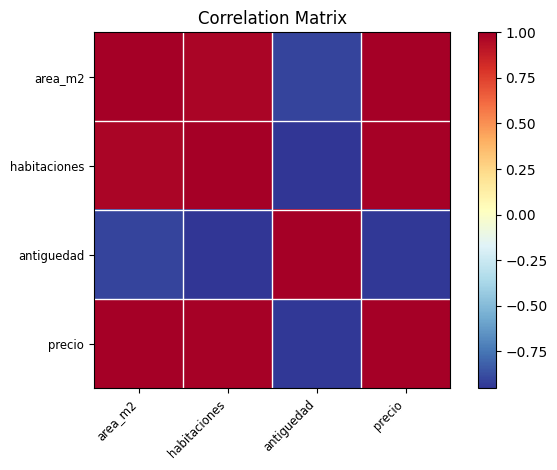

In [104]:
import seaborn as sbs
import statsmodels.api as sm
correlacion=datos_viviendas.corr()
correlacion
sm.graphics.plot_corr(correlacion, xnames=datos_viviendas.columns).show()


In [108]:
X = datos_viviendas[["area_m2", "habitaciones"]]
y = datos_viviendas["precio"]


In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
Scalrx2=StandardScaler()
ScalarxTrain=Scalrx2.fit_transform(X_train)
ScalarxTest=Scalrx2.transform(X_test)
modelregMult=LinearRegression().fit(ScalarxTrain,y_train)
ypredict=modelregMult.predict(ScalarxTest)
r22 = r2_score(y_test, ypredict)
mase2=mean_absolute_error(y_test,ypredict)
mse2=mean_squared_error(y_test,ypredict)
print(f"R² score: {r22:.4f}")
print(f"MAE: {mase2:.2f} de promedio de precios: {datos_viviendas['precio'].mean():.2f}")
print(f"MSE: {mse2:.2f} de promedio de precios: {datos_viviendas['precio'].mean():.2f}")




R² score: 0.9891
MAE: 10025.09 de promedio de precios: 359333.33
MSE: 169010957.42 de promedio de precios: 359333.33
